In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [12,6]
plt.rcParams['figure.autolayout'] = True

In [4]:
df_ndvi = pd.read_csv('C:\\Users\\pallavi.sharma\\Downloads\\OneDrive_1_12-7-2022\\NDVI_tmp.csv')
df_savi = pd.read_csv('C:\\Users\\pallavi.sharma\\Downloads\\OneDrive_1_12-7-2022\\SAVI_tmp.csv')
df_ndre = pd.read_csv('C:\\Users\\pallavi.sharma\\Downloads\\OneDrive_1_12-7-2022\\NDRE_tmp.csv')

In [5]:
df_ndvi.head()

,Date,ndvi
0,2018-12-31,0.490333
1,2019-01-31,0.426000
2,2019-02-28,0.472000
3,2019-03-31,0.191000
4,2019-04-30,0.221200


In [6]:
df_ndvi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    48 non-null     object 
 1   ndvi    36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 896.0+ bytes


In [7]:
df_ndvi['Date'] = pd.to_datetime(df_ndvi['Date'])
df_savi['Date'] = pd.to_datetime(df_savi['Date'])
df_ndre['Date'] = pd.to_datetime(df_ndre['Date'])

In [8]:
df_ndvi.set_index('Date', inplace=True)
df_savi.set_index('Date', inplace=True)
df_ndre.set_index('Date', inplace=True)

In [9]:
def plot_yearly(df,start,end):
    
    index = df.loc[start:end].index
    values = df.loc[start:end]
    
    figure,axis = plt.subplots()
    plt.tight_layout()
    figure.autofmt_xdate()
    axis.plot(index,values)
    #axis.legend()
    
    axis.set(xlabel='Date', ylabel='Values',title='Vegetation Indices')

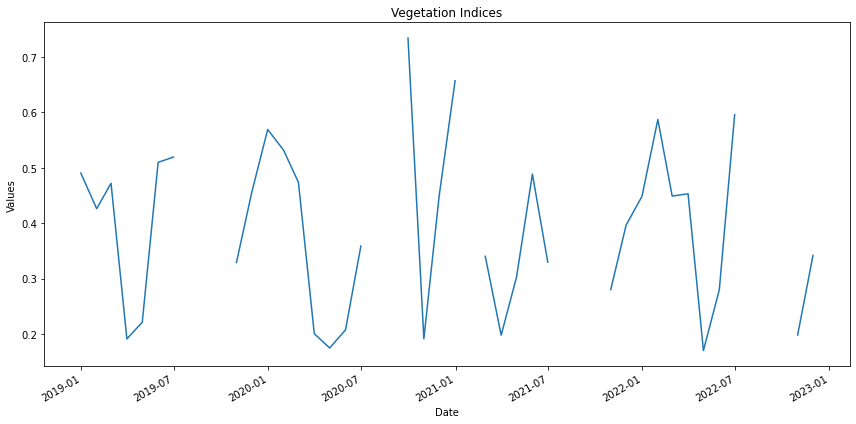

In [10]:
plot_yearly(df_ndvi,'2017-01-31','2022-12-31')

In [11]:
ndvi_values = df_ndvi.loc[:].to_numpy()
savi_values = df_savi.loc[:].to_numpy()
ndre_values = df_ndre.loc[:].to_numpy()
index = df_ndvi.loc[:].index

In [12]:
ndvi = df_ndvi['ndvi']
savi = df_savi['savi']
ndre = df_ndre['ndre']
labels = df_ndvi.index.tolist()

In [13]:
x = np.arange(len(index))  # the label locations
width = 0.45 

<AxesSubplot:xlabel='Date'>

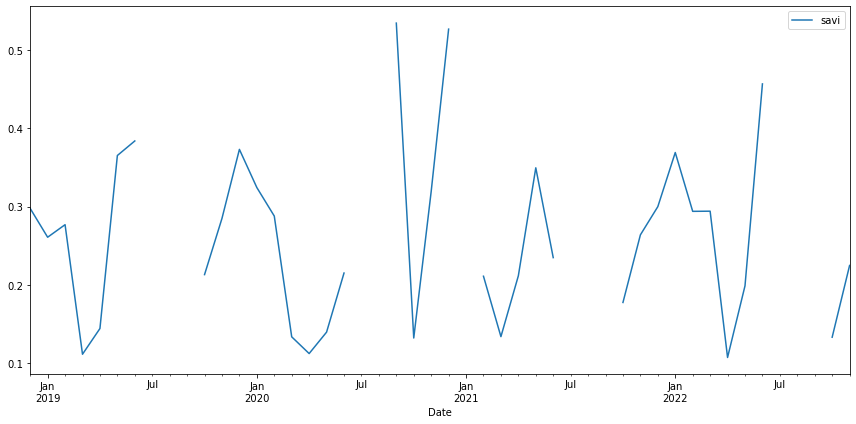

In [14]:
df_savi.plot()

In [15]:
df_ndvi.head()

,ndvi
Date,
2018-12-31,0.490333
2019-01-31,0.426000
2019-02-28,0.472000
2019-03-31,0.191000
2019-04-30,0.221200


In [16]:
df_savi.head()

,savi
Date,
2018-12-31,0.297667
2019-01-31,0.261000
2019-02-28,0.277000
2019-03-31,0.111800
2019-04-30,0.144600


In [17]:
df_ndre.head()

,ndre
Date,
2018-12-31,0.3170
2019-01-31,0.2575
2019-02-28,0.3070
2019-03-31,0.1170
2019-04-30,0.1432


In [18]:
df_tmp = pd.merge(df_ndvi,df_savi, on = 'Date')

In [19]:
df_final = pd.merge(df_tmp,df_ndre, on = 'Date')

In [20]:
df_final.head()

,ndvi,savi,ndre
Date,,,
2018-12-31,0.490333,0.297667,0.3170
2019-01-31,0.426000,0.261000,0.2575
2019-02-28,0.472000,0.277000,0.3070
2019-03-31,0.191000,0.111800,0.1170
2019-04-30,0.221200,0.144600,0.1432


<AxesSubplot:xlabel='Date'>

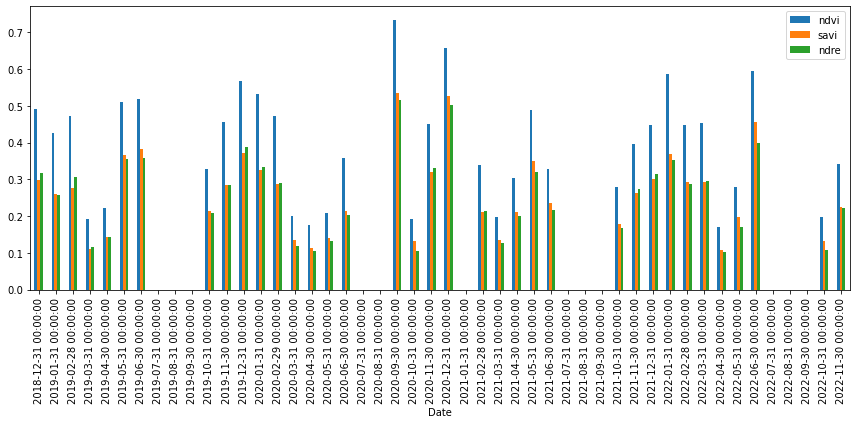

In [22]:
df_final.plot(kind='bar')

In [22]:
df_final.T

Date,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,...,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30
ndvi,0.490333,0.4260,0.472,0.1910,0.2212,0.5096,0.51925,NaN,NaN,NaN,...,0.44875,0.4530,0.170000,0.2796,0.5955,NaN,NaN,NaN,0.1980,0.34175
savi,0.297667,0.2610,0.277,0.1118,0.1446,0.3652,0.38375,NaN,NaN,NaN,...,0.29400,0.2942,0.107667,0.1990,0.4565,NaN,NaN,NaN,0.1335,0.22500
ndre,0.317000,0.2575,0.307,0.1170,0.1432,0.3544,0.35900,NaN,NaN,NaN,...,0.28650,0.2960,0.101833,0.1694,0.3995,NaN,NaN,NaN,0.1085,0.22150


In [40]:
df_final.reset_index(inplace=True)

In [41]:
df_final.head()

,Date,ndvi,savi,ndre,Year
0,2018-12-31,0.490333,0.297667,0.3170,2018
1,2019-01-31,0.426000,0.261000,0.2575,2019
2,2019-02-28,0.472000,0.277000,0.3070,2019
3,2019-03-31,0.191000,0.111800,0.1170,2019
4,2019-04-30,0.221200,0.144600,0.1432,2019


In [45]:
year = df_final["Date"].dt.year.tolist()
month = df_final['Date'].dt.month.tolist()

In [46]:
df_final['Year'] = year
df_final['Month'] = month

In [47]:
df_final.head()

,Date,ndvi,savi,ndre,Year,Month
0,2018-12-31,0.490333,0.297667,0.3170,2018,12
1,2019-01-31,0.426000,0.261000,0.2575,2019,1
2,2019-02-28,0.472000,0.277000,0.3070,2019,2
3,2019-03-31,0.191000,0.111800,0.1170,2019,3
4,2019-04-30,0.221200,0.144600,0.1432,2019,4


In [48]:
df_final.tail()

,Date,ndvi,savi,ndre,Year,Month
43,2022-07-31,NaN,NaN,NaN,2022,7
44,2022-08-31,NaN,NaN,NaN,2022,8
45,2022-09-30,NaN,NaN,NaN,2022,9
46,2022-10-31,0.19800,0.1335,0.1085,2022,10
47,2022-11-30,0.34175,0.2250,0.2215,2022,11


In [49]:
df_final.set_index('Date', inplace=True)

In [50]:
df_final.head()

,ndvi,savi,ndre,Year,Month
Date,,,,,
2018-12-31,0.490333,0.297667,0.3170,2018,12
2019-01-31,0.426000,0.261000,0.2575,2019,1
2019-02-28,0.472000,0.277000,0.3070,2019,2
2019-03-31,0.191000,0.111800,0.1170,2019,3
2019-04-30,0.221200,0.144600,0.1432,2019,4


In [51]:
df_final.T

Date,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,...,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30
ndvi,0.490333,0.4260,0.472,0.1910,0.2212,0.5096,0.51925,NaN,NaN,NaN,...,0.44875,0.4530,0.170000,0.2796,0.5955,NaN,NaN,NaN,0.1980,0.34175
savi,0.297667,0.2610,0.277,0.1118,0.1446,0.3652,0.38375,NaN,NaN,NaN,...,0.29400,0.2942,0.107667,0.1990,0.4565,NaN,NaN,NaN,0.1335,0.22500
ndre,0.317000,0.2575,0.307,0.1170,0.1432,0.3544,0.35900,NaN,NaN,NaN,...,0.28650,0.2960,0.101833,0.1694,0.3995,NaN,NaN,NaN,0.1085,0.22150
Year,2018.000000,2019.0000,2019.000,2019.0000,2019.0000,2019.0000,2019.00000,2019.0,2019.0,2019.0,...,2022.00000,2022.0000,2022.000000,2022.0000,2022.0000,2022.0,2022.0,2022.0,2022.0000,2022.00000
Month,12.000000,1.0000,2.000,3.0000,4.0000,5.0000,6.00000,7.0,8.0,9.0,...,2.00000,3.0000,4.000000,5.0000,6.0000,7.0,8.0,9.0,10.0000,11.00000


<AxesSubplot:xlabel='Date'>

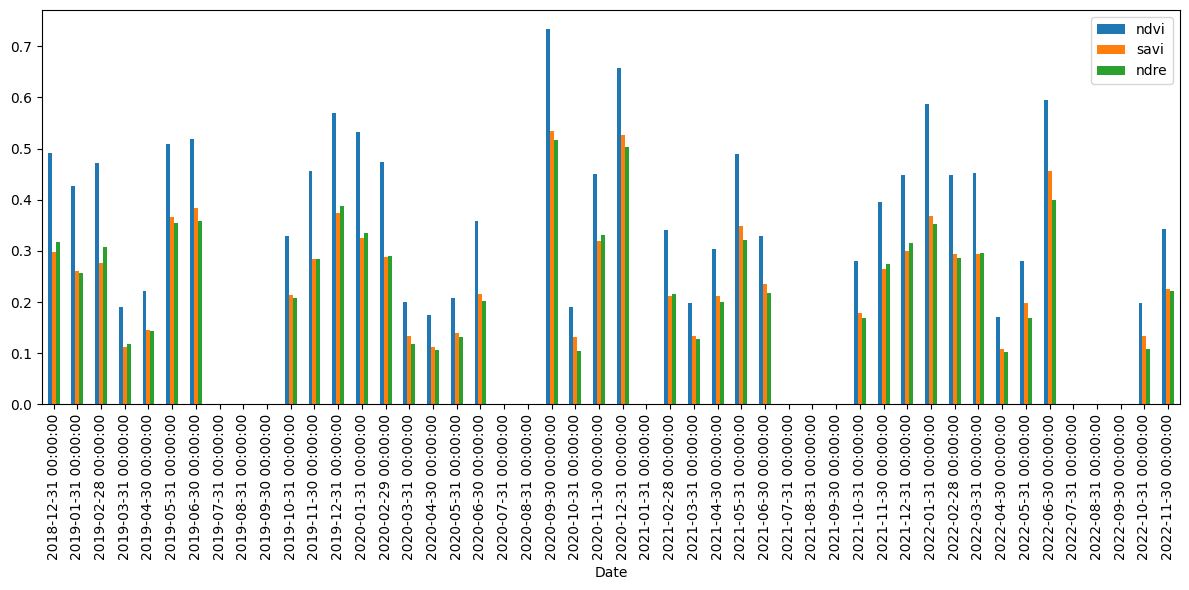

In [53]:
df_final[['ndvi','savi','ndre']].plot(kind='bar')

In [60]:
def set_value(row_number, assigned_value):
    return assigned_value[row_number]
yield_dict = {2018 : 28.32, 2019 : 24.72, 2020 : 25.27, 2021 :26.81,2022 : 27.0}

In [61]:
df_final['Yield'] = df_final['Year'].apply(set_value, args =(yield_dict, ))

In [62]:
df_final.head()

,ndvi,savi,ndre,Year,Month,Yield
Date,,,,,,
2018-12-31,0.490333,0.297667,0.3170,2018,12,28.32
2019-01-31,0.426000,0.261000,0.2575,2019,1,24.72
2019-02-28,0.472000,0.277000,0.3070,2019,2,24.72
2019-03-31,0.191000,0.111800,0.1170,2019,3,24.72
2019-04-30,0.221200,0.144600,0.1432,2019,4,24.72


In [63]:
df_final.tail()

,ndvi,savi,ndre,Year,Month,Yield
Date,,,,,,
2022-07-31,NaN,NaN,NaN,2022,7,27.0
2022-08-31,NaN,NaN,NaN,2022,8,27.0
2022-09-30,NaN,NaN,NaN,2022,9,27.0
2022-10-31,0.19800,0.1335,0.1085,2022,10,27.0
2022-11-30,0.34175,0.2250,0.2215,2022,11,27.0


In [64]:
df_final.isna().sum()

ndvi     12
savi     12
ndre     12
Year      0
Month     0
Yield     0
dtype: int64

In [66]:
df_final.dropna(inplace=True)

In [67]:
df_final.isna().sum()

ndvi     0
savi     0
ndre     0
Year     0
Month    0
Yield    0
dtype: int64

In [72]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2018-12-31 to 2022-11-30
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ndvi    36 non-null     float64
 1   savi    36 non-null     float64
 2   ndre    36 non-null     float64
 3   Year    36 non-null     int64  
 4   Month   36 non-null     int64  
 5   Yield   36 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.0 KB


In [68]:
df_final.describe()

,ndvi,savi,ndre,Year,Month,Yield
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,0.389409,0.261149,0.254144,2020.361111,6.222222,25.943889
std,0.150995,0.111876,0.110750,1.174802,3.818086,1.050067
min,0.170000,0.107667,0.101833,2018.000000,1.000000,24.720000
25%,0.265000,0.169500,0.161950,2019.000000,3.000000,25.132500
50%,0.411167,0.262500,0.266083,2020.000000,5.000000,25.270000
75%,0.488958,0.320583,0.323875,2021.000000,10.000000,26.857500
max,0.734000,0.534000,0.517000,2022.000000,12.000000,28.320000


In [69]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df_final, title="Yield Profiling Report")

In [70]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [73]:
import seaborn as sns

<AxesSubplot:>

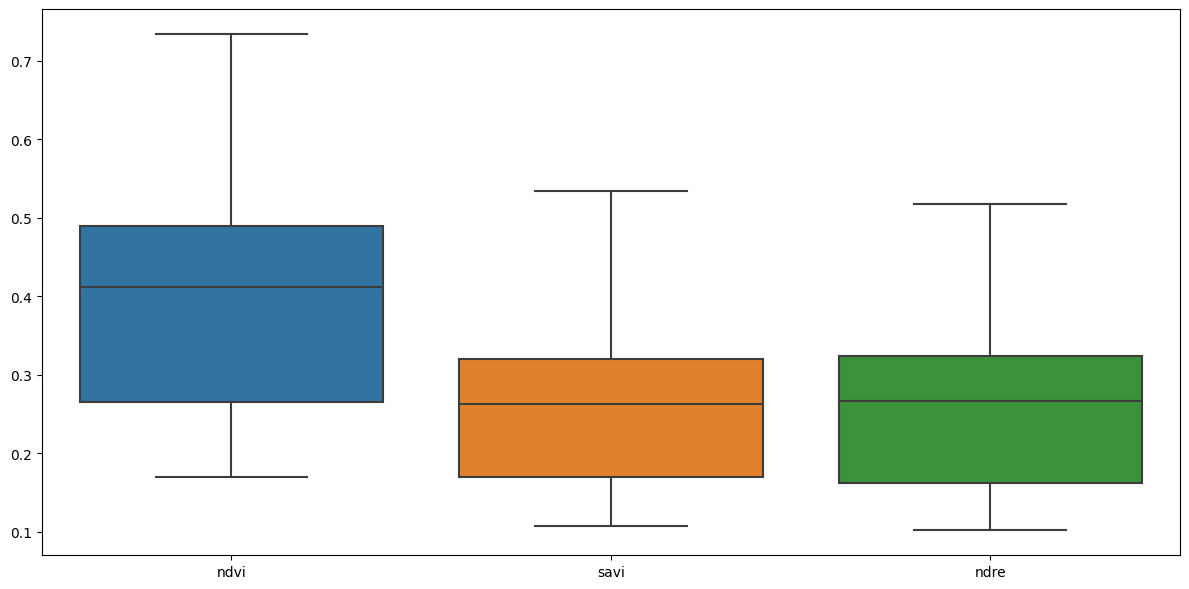

In [78]:
sns.boxplot(df_final[['ndvi','savi','ndre']])

<AxesSubplot:ylabel='Density'>

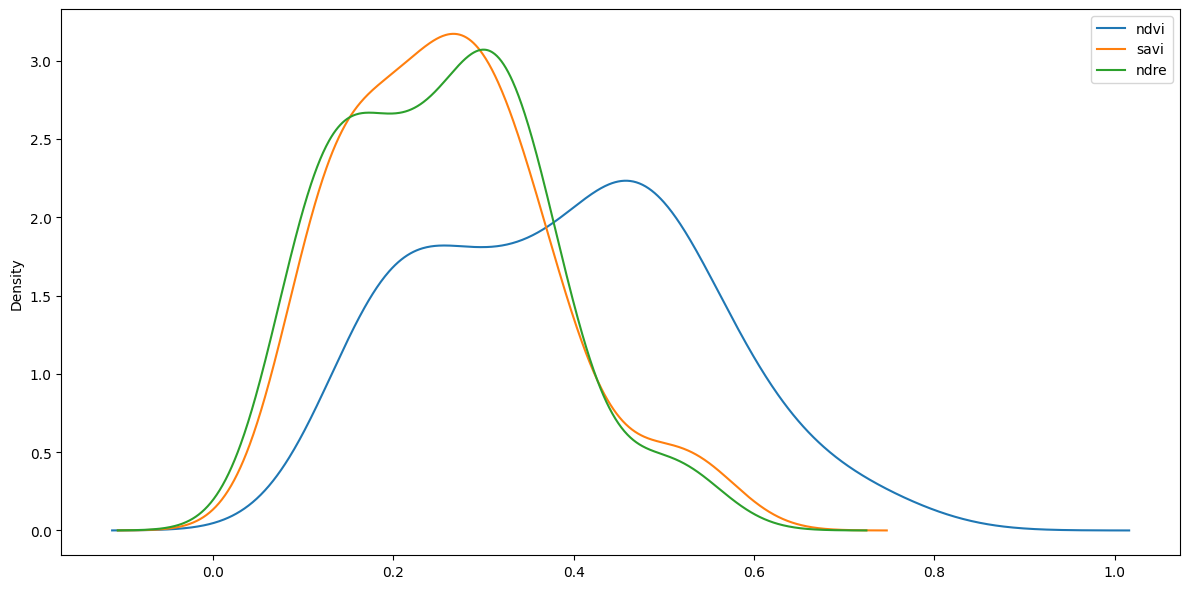

In [83]:
df_final[['ndvi','savi','ndre']].plot(kind='kde')

In [84]:
df_final.shape

(36, 6)

# Model Training

In [85]:
y = df_final['Yield']
X = df_final.drop('Yield', axis=1)

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
     

In [89]:
def plot_regression_results(ax, y_test, y_pred, title, estimated_time, scores):
    slope, intercept, rvalue, pvalue, stderr = linregress(y_test, y_pred)
    ax.plot([y_test.min(), y_test.max()], [intercept+y_test.min()*slope, intercept+y_test.max()*slope], '--r')

    ax.scatter(y_test, y_pred, alpha=0.7)

  # Anzeigen der Werte in einer Box
    extra = plt.Rectangle((0, 0), 0, 0, fc="w", fill=False,edgecolor='none', linewidth=0)
    ax.legend([extra], [scores], loc='upper left')

    ax.set_xlabel('Actual values in tonnes')
    ax.set_ylabel('Predictes values in tonnes')
    ax.set_title('{}\nTrained in {:.2f} Milliseconds'.format(name, estimated_time*1000))
     

C:\Users\ashutosh.baruah1\Anaconda3\envs\geo_env\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(


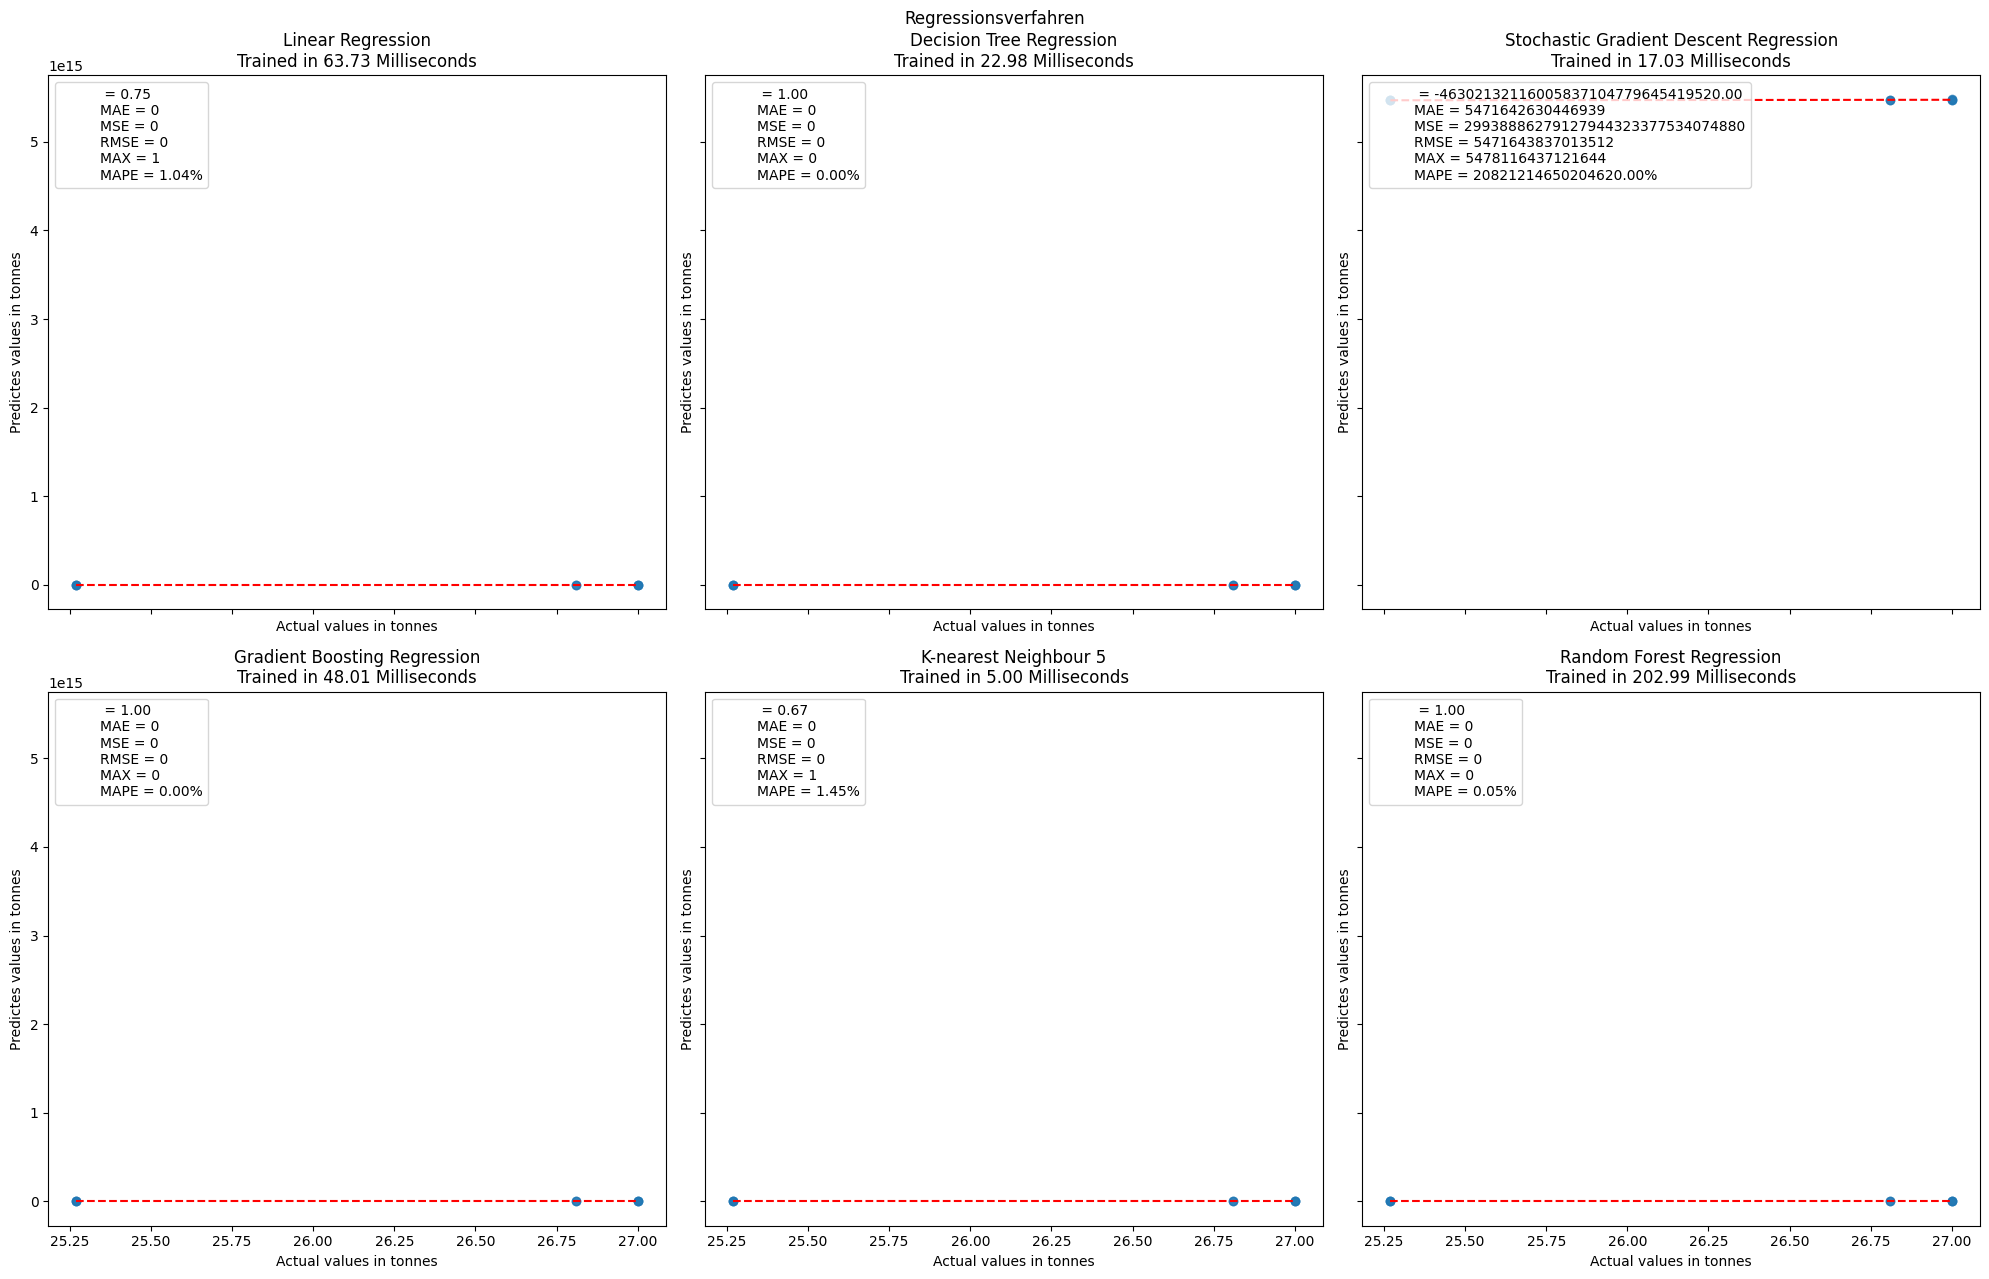

In [90]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, max_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor

import time
from scipy.stats import linregress

lin = LinearRegression()
dtr = DecisionTreeRegressor()
sgd = SGDRegressor(loss='squared_loss')
gbr = GradientBoostingRegressor()
knn = KNeighborsRegressor(n_neighbors=5)
rfr = RandomForestRegressor()

# Verwendete Regressionen
estimators = [('Linear Regression', lin),
              ('Decision Tree Regression', dtr),
              ('Stochastic Gradient Descent Regression', sgd),
              ('Gradient Boosting Regression', gbr),
              ('K-nearest Neighbour 5', knn),
              ('Random Forest Regression', rfr)]

# Festlegen des Subplots
fig, axs = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(20, 13))
axs = np.ravel(axs)

for ax, (name, est) in zip(axs, estimators):
  start_time = time.time()
  # Trainieren des Modelles
  est.fit(X_train, y_train)
  y_pred = est.predict(X_test)
  estimated_time = time.time() - start_time

  # Anzeigen des Modelles
  plot_regression_results(ax, y_test, y_pred, name, estimated_time, 
                          (r' = {:.2f}' + '\n' + 
                          r'MAE = {:.0f}' + '\n' +
                          r'MSE = {:.0f}' + '\n' +
                          r'RMSE = {:.0f}' + '\n' +
                          r'MAX = {:.0f}' + '\n' +
                          r'MAPE = {:.2f}%')
                          .format(r2_score(y_test, y_pred),
                                  mean_absolute_error(y_test, y_pred),
                                  mean_squared_error(y_test, y_pred),
                                  mean_squared_error(y_test, y_pred, squared=False),
                                  max_error(y_test, y_pred),
                                  mean_absolute_percentage_error(y_test, y_pred)))
  
plt.suptitle('Regressionsverfahren')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

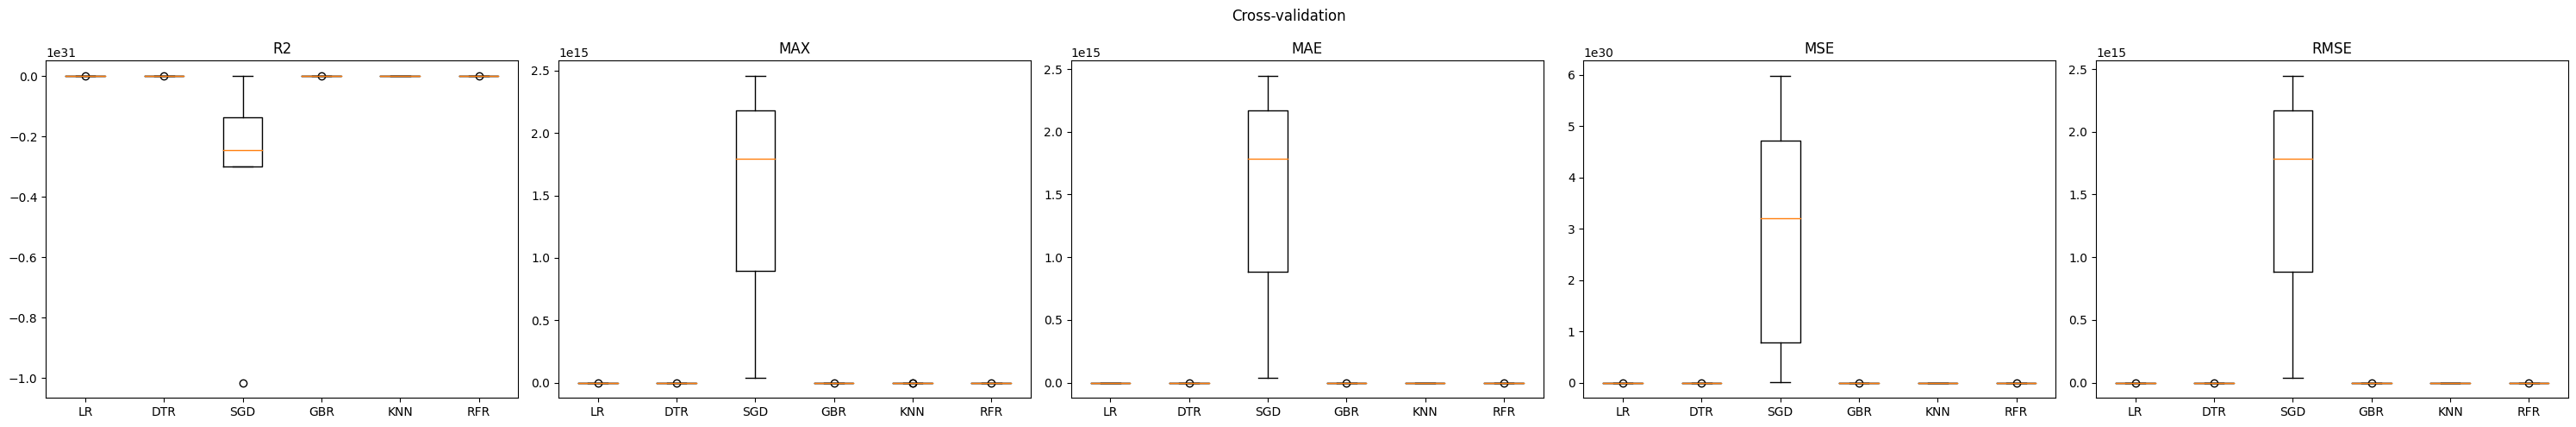

In [91]:
r2_values = []
max_error_values = []
neg_mean_absolute_error_values = []
neg_mean_squared_error_values = []
neg_root_mean_squared_error_values = []

for name, est in estimators:
  # Kreuzvalidierung
  score = cross_validate(est, X_train, y_train, cv=5,
                         scoring=['r2', 'max_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error'],
                         n_jobs=-1)

  # Abspeichern der Werte
  r2_values.append(score['test_r2'])
  max_error_values.append(-score['test_max_error'])
  neg_mean_absolute_error_values.append(-score['test_neg_mean_absolute_error'])
  neg_mean_squared_error_values.append(-score['test_neg_mean_squared_error'])
  neg_root_mean_squared_error_values.append(-score['test_neg_root_mean_squared_error'])

# Plotten der Werte
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(30, 5))

names = ['LR', 'DTR', 'SGD', 'GBR', 'KNN', 'RFR']

axs[0].boxplot(r2_values, labels=names)
axs[0].set_title('R2')
axs[1].boxplot(max_error_values, labels=names)
axs[1].set_title('MAX')
axs[2].boxplot(neg_mean_absolute_error_values, labels=names)
axs[2].set_title('MAE')
axs[3].boxplot(neg_mean_squared_error_values, labels=names)
axs[3].set_title('MSE')
axs[4].boxplot(neg_root_mean_squared_error_values, labels=names)
axs[4].set_title('RMSE')

plt.suptitle('Cross-validation')
plt.show()

RandomForestRegressor()

In [94]:
import pickle

In [95]:
with open('model.pkl', 'wb') as handle:
    pickle.dump(est, handle, protocol=pickle. HIGHEST_PROTOCOL)